In [1]:
%matplotlib inline

In [2]:
#We first import tglc
import tglc
tglc.__version__

'0.6.6'

In [3]:
#We import other needed libraries.
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [4]:
#from matplotlib import rc
#rc('font', **{'family':'sans-serif'}) Use only if you have pdflatex (recommended)
#rc('text', usetex=True)

plt.rcParams['xtick.top'] =  True
plt.rcParams['xtick.direction'] =  'in'
plt.rcParams['xtick.major.width'] =  1.0
plt.rcParams['xtick.minor.width'] =  1.0
plt.rcParams['ytick.right'] =  True
plt.rcParams['ytick.direction'] =  'in'
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.minor.width'] =  1.0
plt.rcParams['lines.markeredgewidth'] =  1.0

In [5]:
#We define the fits files in a list first.
    #hlsp_tglc_tess_ffi_gaiaid-{Gaia DR3 ID}-s{sector}-cam{camera No.}-ccd{CCD No.}_tess_v1_llc.fits
fits_list = ["hlsp_tglc_tess_ffi_gaiaid-22707874346819712-s0031-cam1-ccd4_tess_v1_llc.fits",
             "hlsp_tglc_tess_ffi_gaiaid-22707874346819712-s0042-cam3-ccd3_tess_v1_llc.fits",
             "hlsp_tglc_tess_ffi_gaiaid-22707874346819712-s0043-cam2-ccd4_tess_v1_llc.fits",
             "hlsp_tglc_tess_ffi_gaiaid-22707874346819712-s0070-cam3-ccd3_tess_v1_llc.fits",
             "hlsp_tglc_tess_ffi_gaiaid-22707874346819712-s0071-cam1-ccd4_tess_v1_llc.fits"]

#We also define a list containing the sectors.
sector_list = ["31", "42", "43", "70", "71"]

In [6]:
#We check the information of each fits file.
for fits_file in fits_list:
    hdul = fits.open(fits_file)
    hdul.info()

Filename: hlsp_tglc_tess_ffi_gaiaid-22707874346819712-s0031-cam1-ccd4_tess_v1_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (5, 5, 3459)   float32   
  1  LIGHTCURVE    1 BinTableHDU     59   3459R x 9C   [D, E, E, E, E, E, J, I, I]   
  2                1 ImageHDU         8   (5, 5, 3)   float64   
Filename: hlsp_tglc_tess_ffi_gaiaid-22707874346819712-s0042-cam3-ccd3_tess_v1_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (5, 5, 3534)   float32   
  1  LIGHTCURVE    1 BinTableHDU     59   3534R x 9C   [D, E, E, E, E, E, J, I, I]   
  2                1 ImageHDU         8   (5, 5, 3)   float64   
Filename: hlsp_tglc_tess_ffi_gaiaid-22707874346819712-s0043-cam2-ccd4_tess_v1_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (5, 5, 3408)   float32   
  1  LIGHTCURVE    1 BinTableHDU     59   3408R

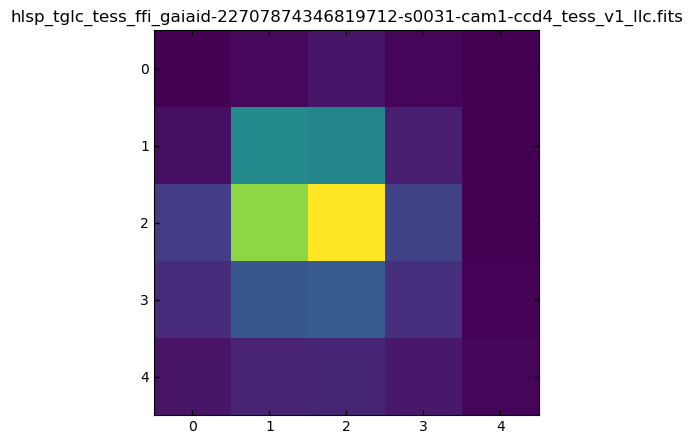

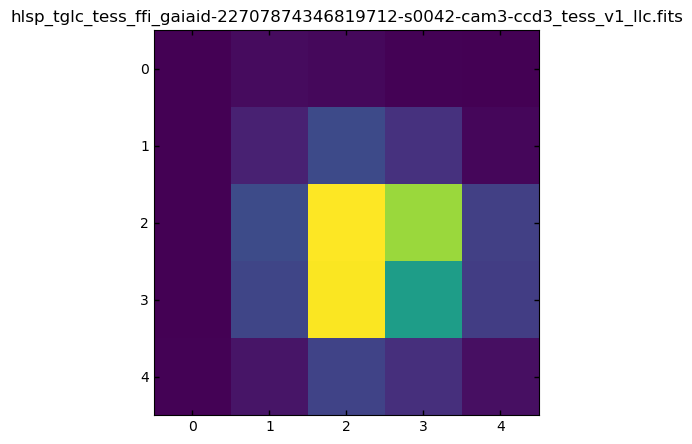

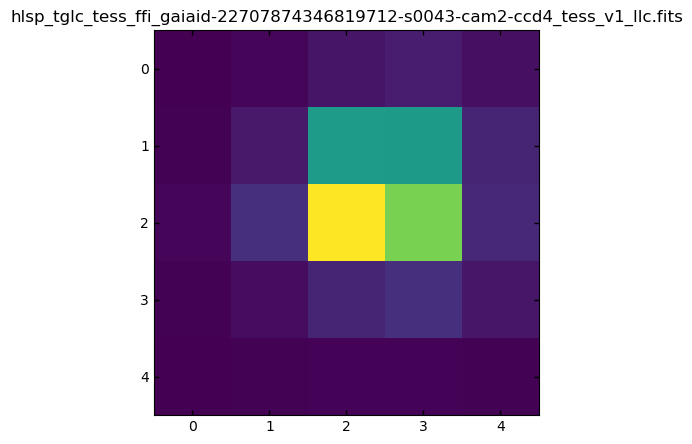

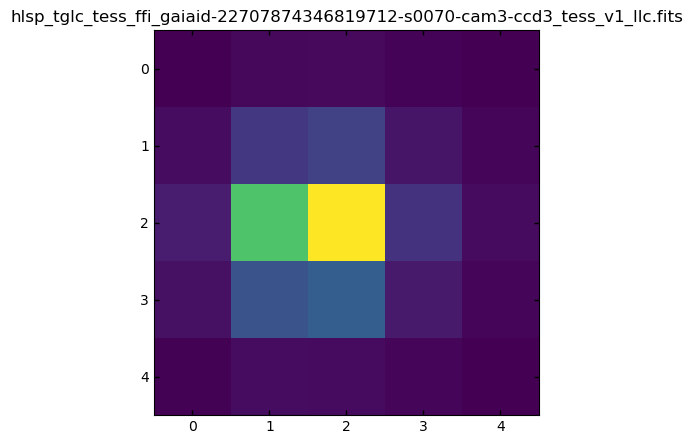

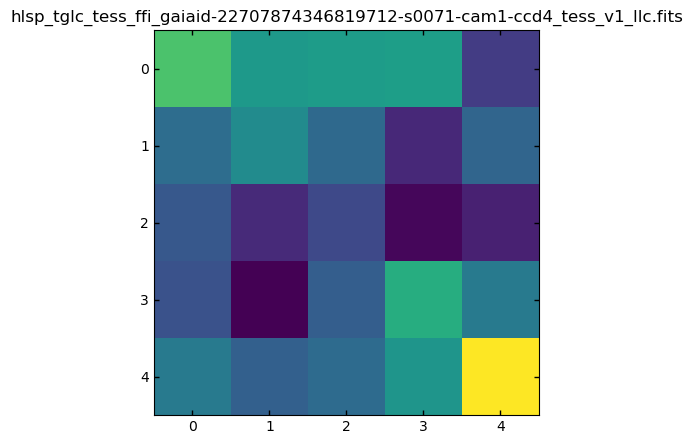

In [7]:
#We then plot the decontaminated image of each fits file.
#We check the information of each fits file.
for fits_file in fits_list:
    plt.figure(figsize = (5,5))
    hdul = fits.open(fits_file)
    aperture_sequence = hdul[0].data
    plt.title(fits_file)
    plt.imshow(aperture_sequence[0])
    plt.show()

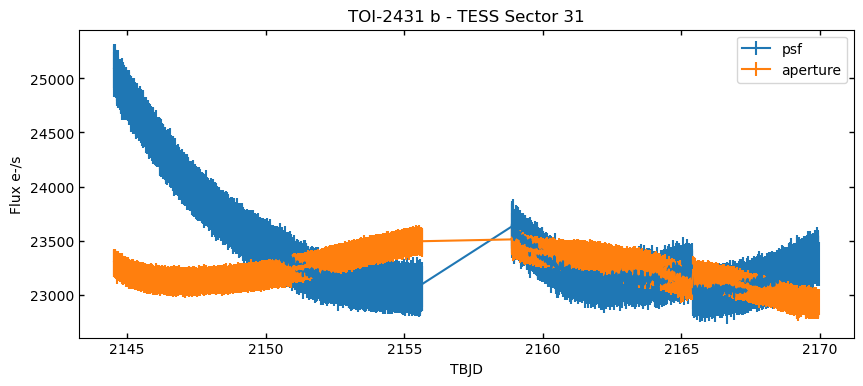

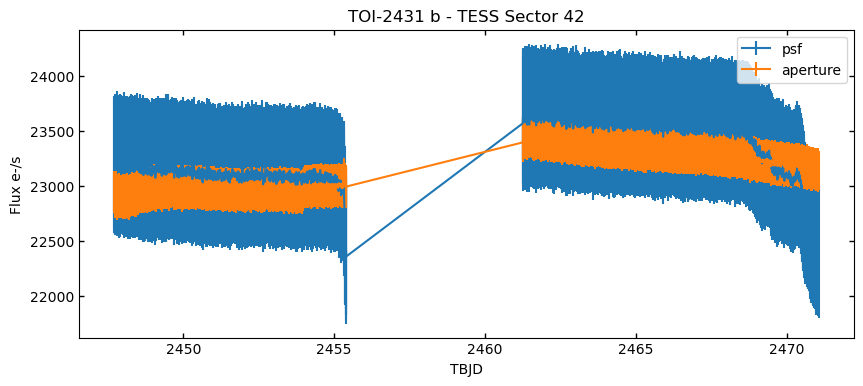

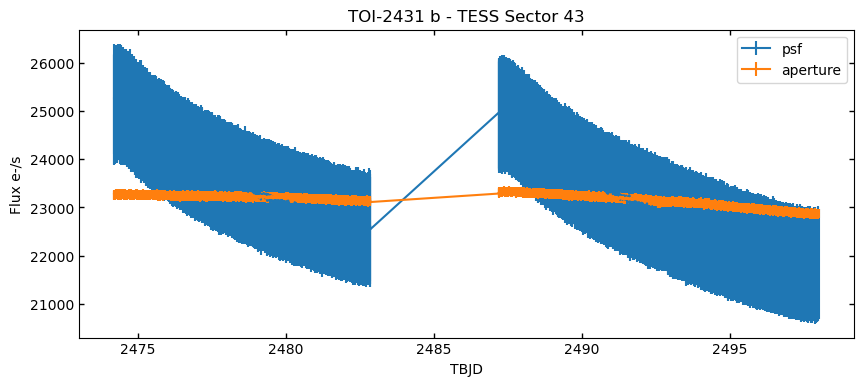

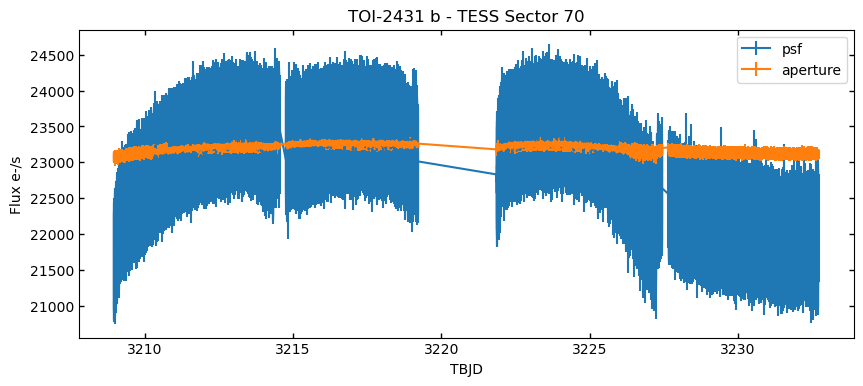

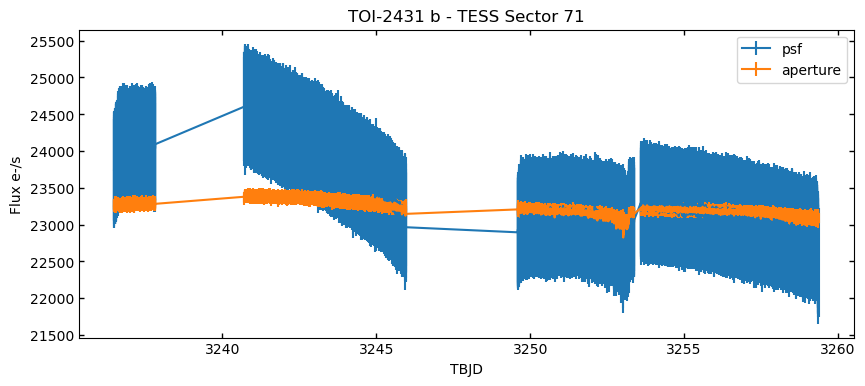

In [8]:
#We then plot the light curves from these sectors.
for i,fits_file in enumerate(fits_list):
    plt.figure(figsize = (10,4))
    hdul = fits.open(fits_file)

    #We first filter out bad datapoints from both TESS FFI flags and TGLC flags.
    q = [a and b for a,b in zip(list(hdul[1].data['TESS_flags'] == 0),
                                list(hdul[1].data['TGLC_flags'] == 0))]

    #We take the time.
    time = hdul[1].data["time"][q]

    #We take the raw PSF flux and its errors.
    psf_flux = hdul[1].data['psf_flux'][q]
    psf_flux_err = hdul[1].header['PSF_ERR']

    #We also take the raw aperature flux and its errors.
    aper_flux = hdul[1].data['aperture_flux'][q]
    aper_flux_err = hdul[1].header['APER_ERR']

    #We plot both light curves (PSF and Aperature)
    plt.errorbar(time, psf_flux, psf_flux_err, marker = '', label = 'psf')
    plt.errorbar(time, aper_flux, aper_flux_err, marker = '', label = 'aperture')

    plt.title(f"TOI-2431 b - TESS Sector {sector_list[i]}")
    plt.xlabel("TBJD")
    plt.ylabel("Flux e-/s")
    plt.legend()
    plt.show()

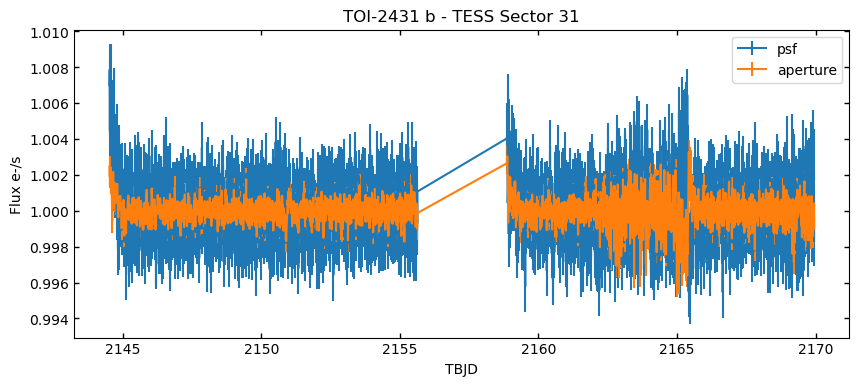

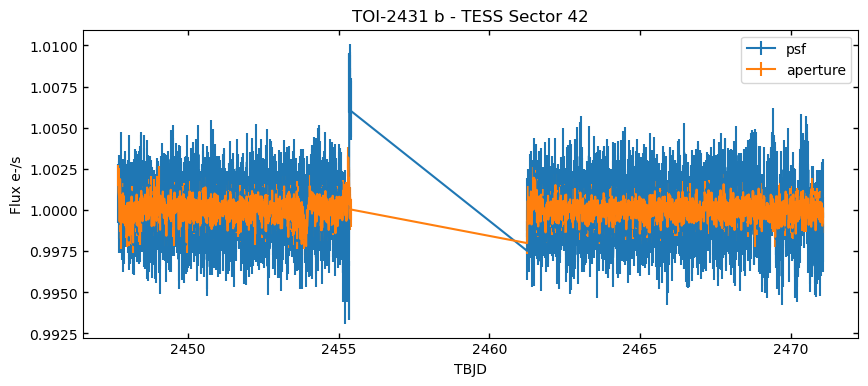

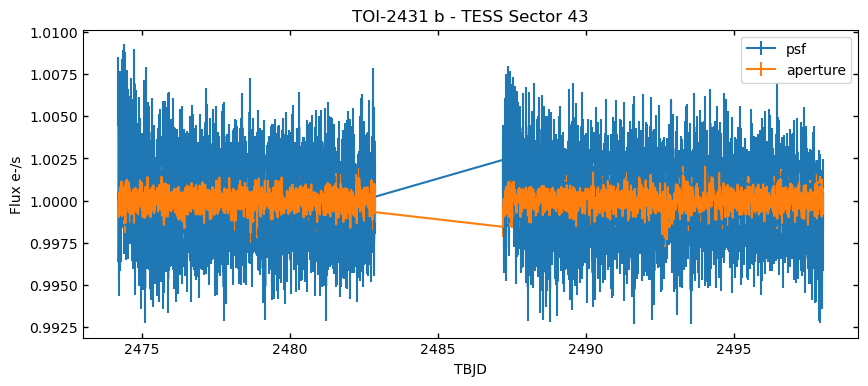

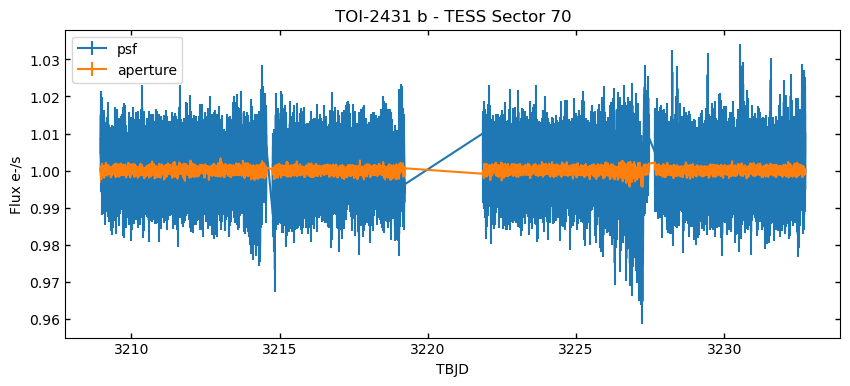

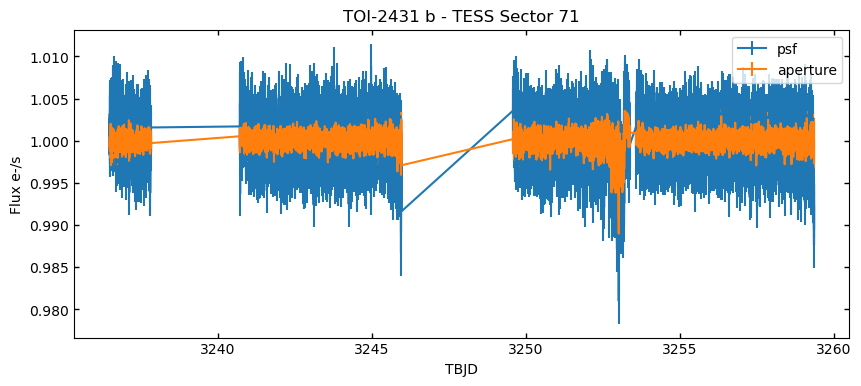

In [9]:
#Since the raw aperture flux sums a 3*3 pixel region around the star, it is not %100 flux from the star.
#We can account for this by:
for i,fits_file in enumerate(fits_list):
    plt.figure(figsize = (10,4))
    hdul = fits.open(fits_file)

    #We first filter out bad datapoints from both TESS FFI flags and TGLC flags.
    q = [a and b for a,b in zip(list(hdul[1].data['TESS_flags'] == 0),
                                list(hdul[1].data['TGLC_flags'] == 0))]

    #We take the time.
    time = hdul[1].data["time"][q]

    #We take the raw PSF flux and its errors.
    psf_flux = hdul[1].data['cal_psf_flux'][q]
    psf_flux_err = hdul[1].header['CPSF_ERR']

    #We also take the raw aperature flux and its errors.
    aper_flux = hdul[1].data['cal_aper_flux'][q]
    aper_flux_err = hdul[1].header['CAPE_ERR']

    #We plot both light curves (PSF and Aperature)
    plt.errorbar(time, psf_flux, psf_flux_err, marker = '', label = 'psf')
    plt.errorbar(time, aper_flux, aper_flux_err, marker = '', label = 'aperture')
    
    plt.title(f"TOI-2431 b - TESS Sector {sector_list[i]}")
    plt.xlabel("TBJD")
    plt.ylabel("Flux e-/s")
    plt.legend()
    plt.show()

In [27]:
#We define a function to bin the midpoints of transit datapoints.
def bin_lc(phase, f, num_bins=40):
    #Shift phase from [-0.5, 0.5] to [0, 1] for binning
    phase = np.mod(phase + 1, 1)

    #Define bin edges and centers
    bin_edges = np.linspace(0, 1, num_bins + 1)
    binned_phase = (bin_edges[:-1] + bin_edges[1:]) / 2
    binned_flux = np.full(num_bins, np.nan)

    for i in range(num_bins):
        mask = (phase >= bin_edges[i]) & (phase < bin_edges[i + 1])
        if np.any(mask):
            binned_flux[i] = np.mean(f[mask])

    #Convert phase back to [-0.5, 0.5]
    binned_phase = binned_phase - (binned_phase > 0.5)

    return binned_phase, binned_flux

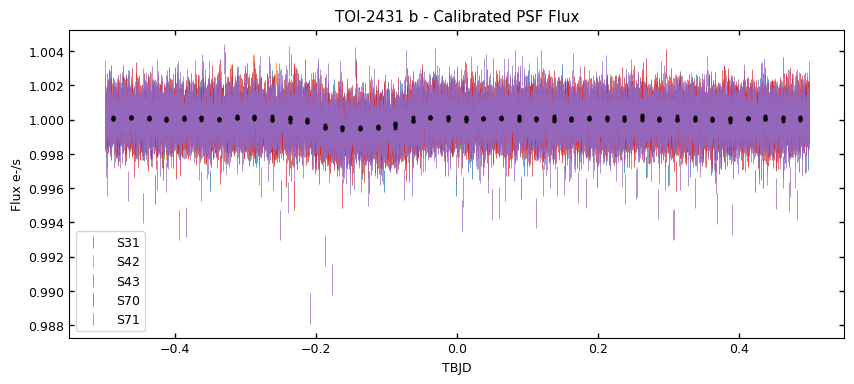

In [39]:
#We can also plot all the sector together as follows.
#We first define the figure that will have all of the sectors.
plt.figure(figsize = (10,4))

#We then define the period of our planet.
#period = 0.2241957793229586
period = 0.224195

#We then go through each fits file and plot the calibrated PSF flux.
for i,fits_file in enumerate(fits_list):
    hdul = fits.open(fits_file)

    #We first filter out bad datapoints from both TESS FFI flags and TGLC flags.
    q = [a and b for a,b in zip(list(hdul[1].data['TESS_flags'] == 0),
                                list(hdul[1].data['TGLC_flags'] == 0))]

    #We take the time.
    time = hdul[1].data["time"][q]

    #Depending on the sector we have to bin the sectors.
    if i <= 26:
        #Primary mission is 1800 seconds.
        time = time

    elif (i > 27 and i <= 55):
        #Since first extended mission is 600 seconds, we bin 3 points => 600 x 3 = 1800 seconds
        time = np.mean(time[:len(time) // 3 * 3].reshape(-1, 3), axis=1)

    elif (i >= 56):
        #Since second extended mission is 200 seconds, we bin 9 points => 200 x 9 = 1800 seconds
        time = np.mean(time[:len(time) // 9 * 9].reshape(-1, 9), axis=1)

    #We then define the phase:
    phase = (time % period) / period
    phase[phase > 0.5] -= 1
    
    #We take the raw Aperature flux and its errors.
    aper_flux = hdul[1].data['cal_aper_flux'][q]
    aper_flux_err = hdul[1].header['CAPE_ERR']

    #We plot the light curve.
    plt.errorbar(phase, aper_flux, aper_flux_err, marker = '', lw=0.5, ls = '', label = f'S{sector_list[i]}')

    #We plot the binned midpoints.
    phase_bin, flux_bin = bin_lc(phase, aper_flux)
    plt.plot(phase_bin, flux_bin, ".", color="black", markersize=4, alpha=0.7, zorder=10)

plt.title("TOI-2431 b - Calibrated PSF Flux")
plt.xlabel("TBJD")
plt.ylabel("Flux e-/s")
plt.legend()
plt.show()

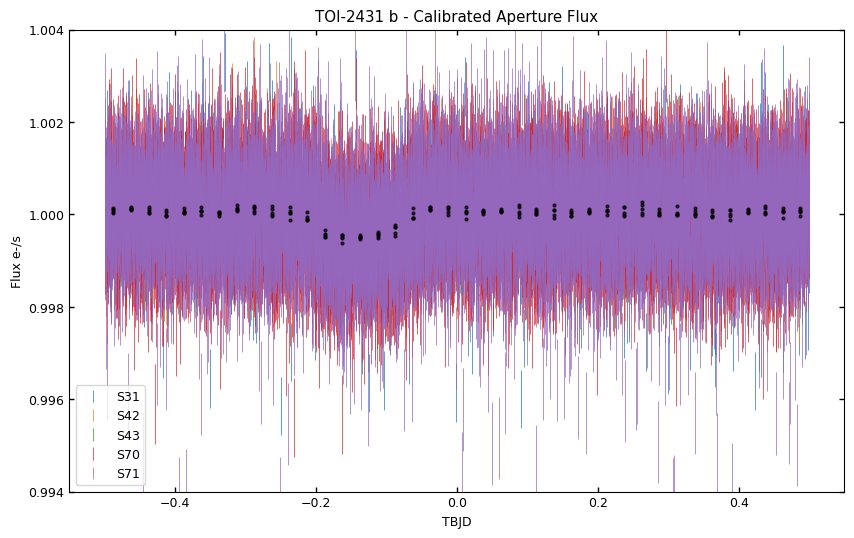

In [47]:
#We can also plot all the sector together as follows.
#We first define the figure that will have all of the sectors.
plt.figure(figsize = (10,6))

#We then define the period of our planet.
#period = 0.2241957793229586
period = 0.224195

#We then go through each fits file and plot the calibrated PSF flux.
for i,fits_file in enumerate(fits_list):
    hdul = fits.open(fits_file)

    #We first filter out bad datapoints from both TESS FFI flags and TGLC flags.
    q = [a and b for a,b in zip(list(hdul[1].data['TESS_flags'] == 0),
                                list(hdul[1].data['TGLC_flags'] == 0))]

    #We take the time.
    time = hdul[1].data["time"][q]

    #Depending on the sector we have to bin the sectors.
    if i <= 26:
        #Primary mission is 1800 seconds.
        time = time

    elif (i > 27 and i <= 55):
        #Since first extended mission is 600 seconds, we bin 3 points => 600 x 3 = 1800 seconds
        time = np.mean(time[:len(time) // 3 * 3].reshape(-1, 3), axis=1)

    elif (i >= 56):
        #Since second extended mission is 200 seconds, we bin 9 points => 200 x 9 = 1800 seconds
        time = np.mean(time[:len(time) // 9 * 9].reshape(-1, 9), axis=1)

    #We then define the phase:
    phase = (time % period) / period
    phase[phase > 0.5] -= 1
    
    #We take the raw Aperature flux and its errors.
    aper_flux = hdul[1].data['cal_aper_flux'][q]
    aper_flux_err = hdul[1].header['CAPE_ERR']

    #We plot the light curve.
    plt.errorbar(phase, aper_flux, aper_flux_err, marker = '', lw=0.5, ls = '', label = f'S{sector_list[i]}')

    #We plot the binned midpoints.
    phase_bin, flux_bin = bin_lc(phase, aper_flux)
    plt.plot(phase_bin, flux_bin, ".", color="black", markersize=4, alpha=0.7, zorder=10)

plt.title("TOI-2431 b - Calibrated Aperture Flux")
plt.xlabel("TBJD")
plt.ylabel("Flux e-/s")
plt.ylim(0.994,1.004)
plt.legend()
plt.show()

Detected dynamic_dynesty sampler output files --- extracting from TOI-2431_juliet_4/_dynesty_DNS_posteriors.pkl
0.2241957793229586 2460258.868550203


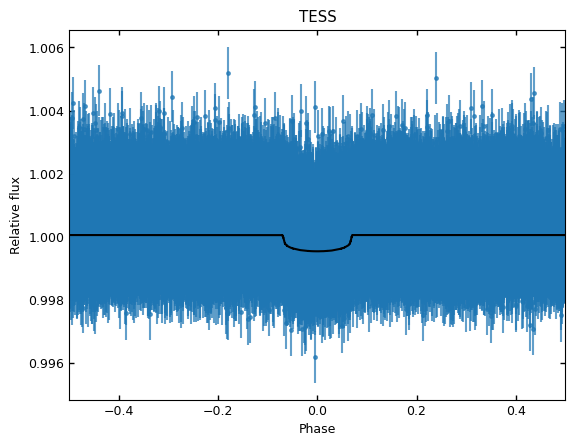

In [25]:
# import juliet
# dataset = juliet.load(input_folder = 'TOI-2431_juliet_4', out_folder = 'TOI-2431_juliet_4')
# results = dataset.fit(sampler = "dynamic_dynesty")
# P = juliet.utils.get_quantiles(results.posteriors['posterior_samples']['P_p1'])[0]
# t0 = juliet.utils.get_quantiles(results.posteriors['posterior_samples']['t0_p1'])[0]
# print(P,t0)

# def plot_with_gp(instrument, title, name, P, t0):
#     global results
#     x = dataset.times_lc[instrument]
#     phases = juliet.utils.get_phases(dataset.times_lc[instrument], P, t0)
#     transit_plus_GP = results.lc.evaluate(instrument)
#     transit_model = results.lc.model[instrument]['deterministic']
#     gp_model = results.lc.model[instrument]['GP']

#     jitter = np.median(results.posteriors['posterior_samples']['sigma_w_'+instrument]) / 1e6
    
#     mask = np.logical_or(np.logical_and(phases>-0.05,phases<-0.02),np.logical_and(phases<0.05,phases>0.02))
#     #print(mask)
#     oot = (dataset.data_lc[instrument] - gp_model)[mask]
#     m_inst = 1-np.mean(oot)
    
#     # print(x)
#     # print(phases)
#     # print(transit_plus_GP)
#     # print(transit_model)
#     # print(gp_model)
#     # print(jitter)
    
#     #m_inst = juliet.utils.get_quantiles(results.posteriors['posterior_samples']['mflux_'+instrument])[0]
#     transit_model = results.lc.model[instrument]['deterministic']
    
#     fig, ax = plt.subplots(dpi=100)
#     plt.errorbar(phases,dataset.data_lc[instrument]-gp_model+m_inst,yerr = np.sqrt(dataset.errors_lc[instrument]**2.0 + jitter**2.0), fmt = '.', alpha = 0.7)

#     idx = np.argsort(phases)
#     plt.plot(phases[idx],transit_model[idx], color='black',zorder=10)

#     plt.xlim([-0.5,0.5])
#     #plt.ylim([0.98,1.02])
#     plt.title(title)
#     #plt.xlim()
#     #plt.ylim([0.995,1.005])
#     plt.xlabel('Phase')
#     plt.ylabel('Relative flux')
#     plt.show()

#     return phases, dataset.data_lc[instrument], np.sqrt(dataset.errors_lc[instrument]**2.0 + jitter**2.0), transit_model, m_inst, gp_model

# phase_tess, flux_tess, flux_err_tess, model_tess, m_tess, gp_model_tess = plot_with_gp("TESS","TESS","TESS_det.csv",P,t0)

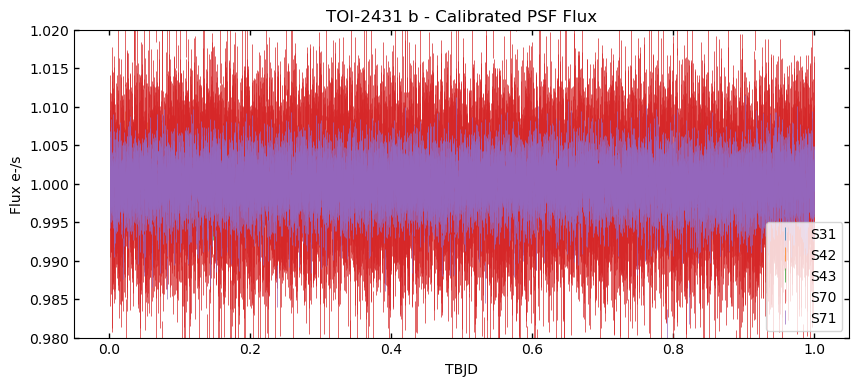